In [22]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import create_engine, inspect, func
from sqlalchemy.orm import Session
import pandas as pd
import matplotlib.pyplot as plt


import datetime as dt 
from datetime import date

In [23]:
#Create_engine to connect to the sqlite database
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [24]:
# Reflect Database into ORM classes
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurements', 'stations']

In [25]:
inspector = inspect(engine)
inspector.get_table_names()

['measurements', 'stations']

In [26]:
columns = inspector.get_columns('measurements')
for c in columns:
    print(c['name'])

id
station
date
prcp
tobs


In [27]:
# Reflect tables into classes  
Station = Base.classes.stations
Measurement = Base.classes.measurements

In [28]:
# Create a session
session = Session(engine)

In [29]:
today = date.today()
last_year = date.today()-dt.timedelta(365)

print(today)
print(last_year)

2018-04-30
2017-04-30


In [30]:
data = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= last_year).all()

In [31]:
#put the pulled data into a dataframe
precip_analys = pd.DataFrame(data)

#rename prcp to Precipitation and set the date to the index
precip_analys = precip_analys.rename(columns = {"prcp":"precipitation"})
precip_analys = precip_analys.set_index('date')

precip_analys.head()

,precipitation
date,
2017-04-30,0.89
2017-05-01,0.26
2017-05-02,0.00
2017-05-03,0.00
2017-05-04,0.00


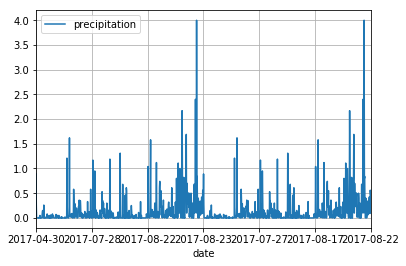

In [32]:
precip_analys.plot(x_compat = True)
plt.tight_layout

plt.legend(loc = 2)
plt.grid(True)

plt.show()